# Trains a simple Deep NN on the MNIST dataset.  
Gets to 98.3% test accuracy after 15 epoch.

In [1]:
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

%matplotlib inline

C:\Users\Milan Cugurovic\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<img src='./mnist.JPG' height=800 width=800>

In [3]:
# DEFINE PARAMETERS
batch_size = 128  # size of batch
num_classes = 10  # 0, 1, ..., 9
epochs = 15       # number of epochs

In [4]:
# RESHAPE IMAGES
x_train.shape  # (60000, 28, 28)
x_test.shape   # (10000, 28, 28)

x_train = x_train.reshape(60000, 784)  # 28x28=784
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')    # Because of data normalization
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255

print(x_train.shape[0], 'training seamples')
print(x_test.shape[0], 'test seamples')

60000 training seamples
10000 test seamples


In [5]:
# DUMMY CODING
y_train  # array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

y_train = to_categorical(y_train, num_classes)  # Converts a class vector (integers) to binary class matrix. (10,)
y_test = to_categorical(y_test, num_classes)

# 7 --> array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)
# 2 --> array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
# 0 --> array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Feed Forward Neural Network

In [6]:
r = Sequential()

In [7]:
r.add(Dense(units=512, input_dim=784, activation='relu'))
r.add(Dropout(0.4))  # Add a dropout layer for previous hidden layer

In [8]:
r.add(Dense(units=512, activation='relu'))
r.add(Dropout(0.4))  # Add a dropout layer for previous hidden layer

In [9]:
r.add(Dense(units=num_classes, activation='softmax'))

In [10]:
r.summary()  # Summary of our network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
r.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])  # Compile our model

In [12]:
history = r.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=1.0/12)  # Train

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 38s 686us/step - loss: 0.3067 - acc: 0.9062 - val_loss: 0.0999 - val_acc: 0.9720
Epoch 2/15
55000/55000 [==============================] - 40s 728us/step - loss: 0.1440 - acc: 0.9580 - val_loss: 0.0765 - val_acc: 0.9786
Epoch 3/15
55000/55000 [==============================] - 40s 722us/step - loss: 0.1116 - acc: 0.9673 - val_loss: 0.0670 - val_acc: 0.9798
Epoch 4/15
55000/55000 [==============================] - 43s 783us/step - loss: 0.0942 - acc: 0.9722 - val_loss: 0.0753 - val_acc: 0.9800
Epoch 5/15
55000/55000 [==============================] - 44s 802us/step - loss: 0.0838 - acc: 0.9758 - val_loss: 0.0776 - val_acc: 0.9830
Epoch 6/15
55000/55000 [==============================] - 39s 705us/step - loss: 0.0770 - acc: 0.9783 - val_loss: 0.0758 - val_acc: 0.9810
Epoch 7/15
55000/55000 [==============================] - 36s 660us/step - loss: 0.0722 - acc: 0.9792 - val_loss: 0.0

### Model analysis

In [13]:
test_loss, test_acc = r.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 333us/step


In [14]:
test_loss

0.08660309846304148

In [15]:
test_acc

0.9831

### Plot error/accuracy

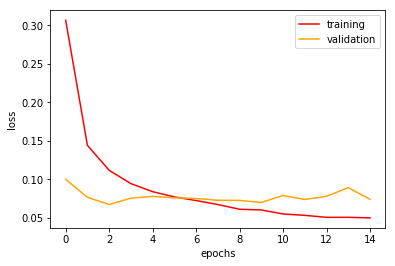

In [16]:
# ERROR PLOT
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, val_loss, c='orange', label='validation')
plt.legend()
plt.show()

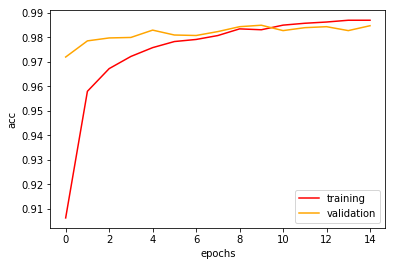

In [17]:
# ACCURACY PLOT
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, val_acc, c='orange', label='validation')
plt.legend()
plt.show()

### TODO

In [18]:
# Investigate about RMSProp() (Both online and ?RMSProp())